In [1]:
import cv2
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

# local import
from sol_Laplace_Equation_Axb import sol_Laplace_Equation_Axb



In [2]:
# parameter class 
@dataclass
class Parameters:
    hi: float
    hj: float
    dt: float
    iterMax: float
    tol: float

In [3]:
# image directory
folderInput = "./IMAGES/"

### TEST 1

In [4]:
# read image
figure_name = 'image1'
figure_name_final=folderInput+figure_name+'_toRestore.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

In [5]:
dimensions = I.shape
# height, width, number of channels in image
height = I.shape[0]
width = I.shape[1]

print('Image Dimension    : ', dimensions)
print('Image Height       : ', height)
print('Image Width        : ', width)

Image Dimension    :  (512, 291)
Image Height       :  512
Image Width        :  291


In [6]:
# Normalize values into [0,1]
min_val = np.min(I.ravel())
max_val = np.max(I.ravel())
I = (I.astype('float') - min_val)
I = I/max_val

In [7]:
# read mask image
mask_img_name=folderInput+figure_name+'_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)

In [8]:
# height, width, number of channels in image
height_mask = mask_img.shape[0]
width_mask = mask_img.shape[1]
dimensions_mask = mask_img.shape

ni=height_mask
nj=width_mask

In [9]:
print('Mask Dimension    : ', dimensions_mask)
print('Mask Height       : ', height_mask)
print('Mask Width        : ', width_mask)

#We want to inpaint those areas in which mask == 1
mask1 = mask_img >128
mask=mask1.astype('float')

Mask Dimension    :  (512, 291)
Mask Height       :  512
Mask Width        :  291


In [10]:
#  Parameters
param = Parameters(0,0,0,0,0)
param.hi = 1 / (ni-1)
param.hj = 1 / (nj-1)

In [11]:
# Parameters for gradient descent (you do not need for week1)
param.dt = 5*10^-7
param.iterMax = 10^4
param.tol = 10^-5

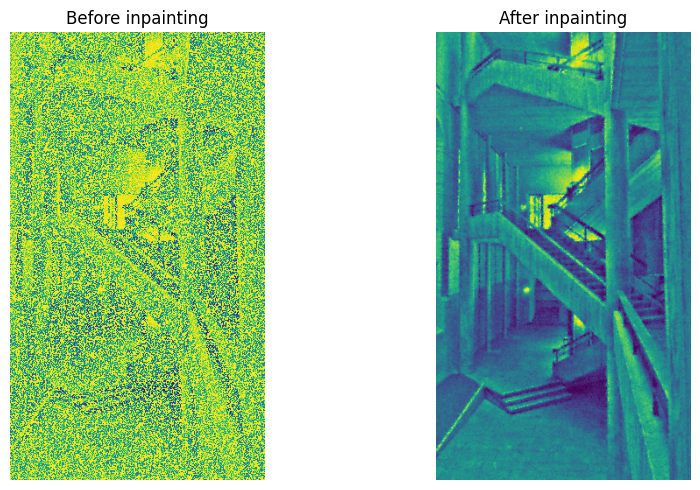

In [12]:
final_image = sol_Laplace_Equation_Axb(I, mask, param)
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))

axarr[0].imshow(I)
axarr[0].axis('off') 
axarr[0].set_title('Before inpainting')

axarr[1].imshow(final_image)
axarr[1].axis('off')
axarr[1].set_title('After inpainting')

plt.tight_layout()  
plt.show()

### TEST 2

In [23]:
def image_inpainting(I:np.array, mask_image:np.array)->np.array:
    #Normalize values into [0,1]
    min_val = np.min(I.ravel())
    max_val = np.max(I.ravel())
    I = (I.astype('float') - min_val)
    I = I/max_val
    
    ni = I.shape[0]
    nj = I.shape[1]

  
    mask1 = mask_image >128
    mask=mask1.astype('float')
    
    
    param = Parameters(0,0,0,0,0)
    param.hi = 1 / (ni-1)
    param.hj = 1 / (nj-1)
    
    if len(I.shape)==3:
        Iinp = np.zeros(I.shape, dtype=np.float32)
        Iinp[:,:,0]=sol_Laplace_Equation_Axb(I[:,:,0], mask[:,:,0], param)
        Iinp[:,:,1]=sol_Laplace_Equation_Axb(I[:,:,1], mask[:,:,1], param)
        Iinp[:,:,2]=sol_Laplace_Equation_Axb(I[:,:,2], mask[:,:,2], param)
    else:
        Iinp = sol_Laplace_Equation_Axb(I, mask, param)

        
    fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
    axarr[0].imshow(I)
    axarr[0].axis('off') 
    axarr[0].set_title('Before inpainting')

    axarr[1].imshow(Iinp)
    axarr[1].axis('off')
    axarr[1].set_title('After inpainting')

    plt.tight_layout()  
    plt.show()
        

In [24]:
# image 2
figure_name = 'image2'
figure_name_final=folderInput+figure_name+'_toRestore.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

# read mask image
mask_img_name=folderInput+figure_name+'_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
image_inpainting(I,mask_img)

In [25]:
# image 3
figure_name = 'image3'
figure_name_final=folderInput+figure_name+'_toRestore.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

# read mask image
mask_img_name=folderInput+figure_name+'_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
image_inpainting(I,mask_img)

In [26]:
# image 4
figure_name = 'image4'
figure_name_final=folderInput+figure_name+'_toRestore.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

# read mask image
mask_img_name=folderInput+figure_name+'_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
image_inpainting(I,mask_img)

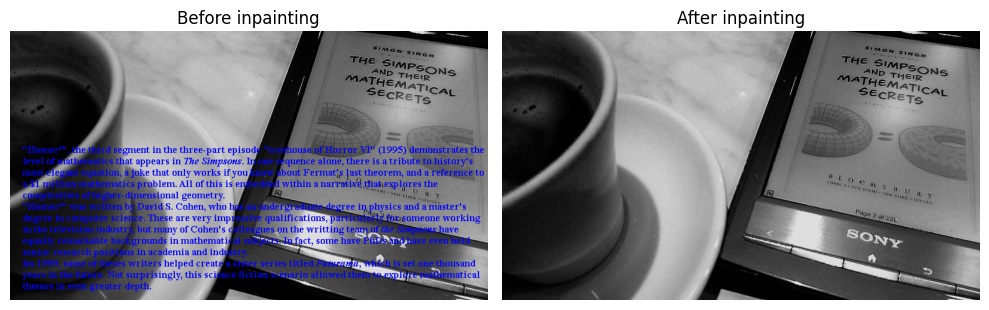

In [27]:
# image 5
figure_name = 'image5'
figure_name_final=folderInput+figure_name+'_toRestore.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

# read mask image
mask_img_name=folderInput+figure_name+'_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
image_inpainting(I,mask_img)

In [28]:
# print(I.shape,mask_img.shape)

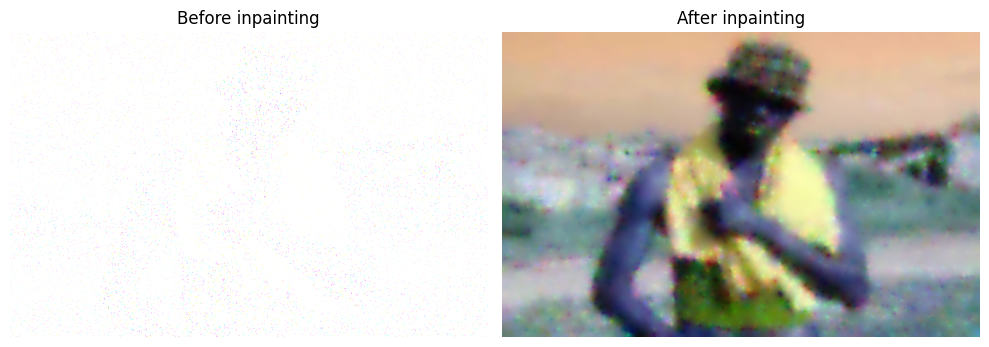

In [29]:
# image 6
figure_name = 'image6'
figure_name_final=folderInput+figure_name+'_toRestore.tif'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

# read mask image
mask_img_name=folderInput+figure_name+'_mask.tif'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
image_inpainting(I,mask_img)

In [30]:
# image 
figure_name = 'image'
figure_name_final=folderInput+figure_name+'_to_Restore.png'
src_image = cv2.imread(figure_name_final)
src_image = cv2.cvtColor(src_image,cv2.COLOR_BGR2RGB)

# create mask 
lower_red = np.array([0, 0, 0])
upper_red = np.array([255, 0, 0])

# Create the mask
mask = cv2.inRange(src_image, lower_red, upper_red)

# Convert the single channel mask to a 3 channel mask
mask_3_channel = cv2.merge([mask, mask, mask])


image_inpainting(src_image,mask_3_channel)


libpng warning: iCCP: known incorrect sRGB profile


(600, 800, 3) (600, 800, 3)


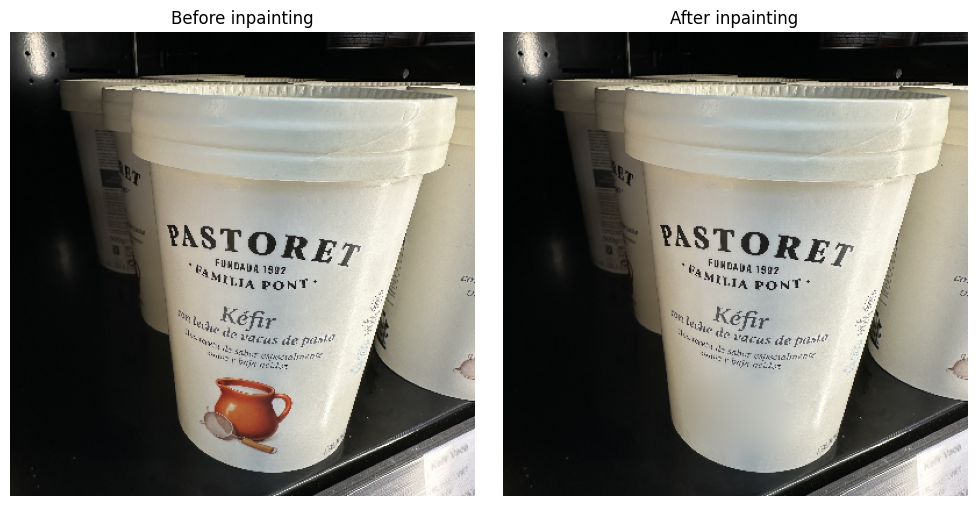

In [31]:
# example image 1
figure_name_final='./IMAGES/example 1.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)
I = cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
I = cv2.resize(I, (400,400))


# read mask image
mask_img_name='./IMAGES/example 1_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
mask_img = cv2.resize(mask_img, (400,400))

image_inpainting(I,mask_img)

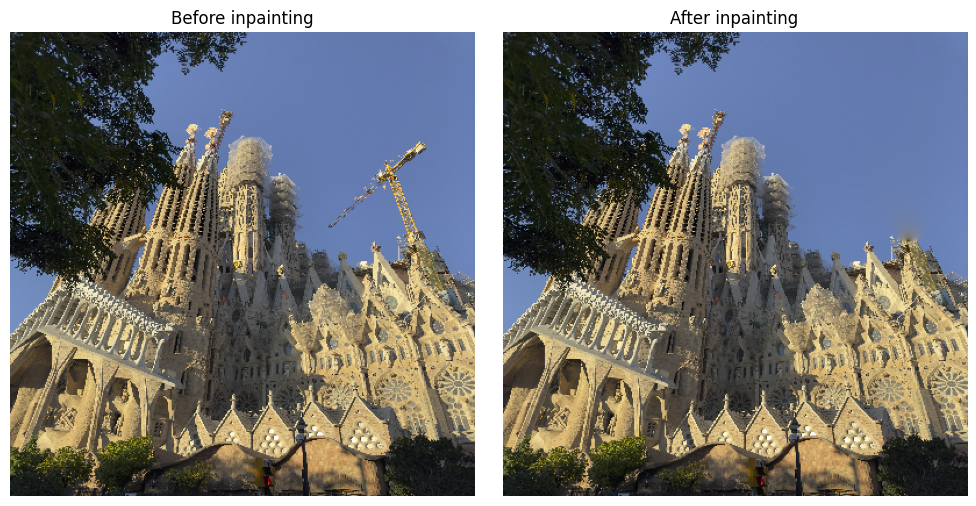

In [32]:
# example image 1
figure_name_final='./IMAGES/example 2.jpeg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)
I = cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
I = cv2.resize(I, (400,400))


# read mask image
mask_img_name='./IMAGES/example 2_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
mask_img = cv2.resize(mask_img, (400,400))

image_inpainting(I,mask_img)

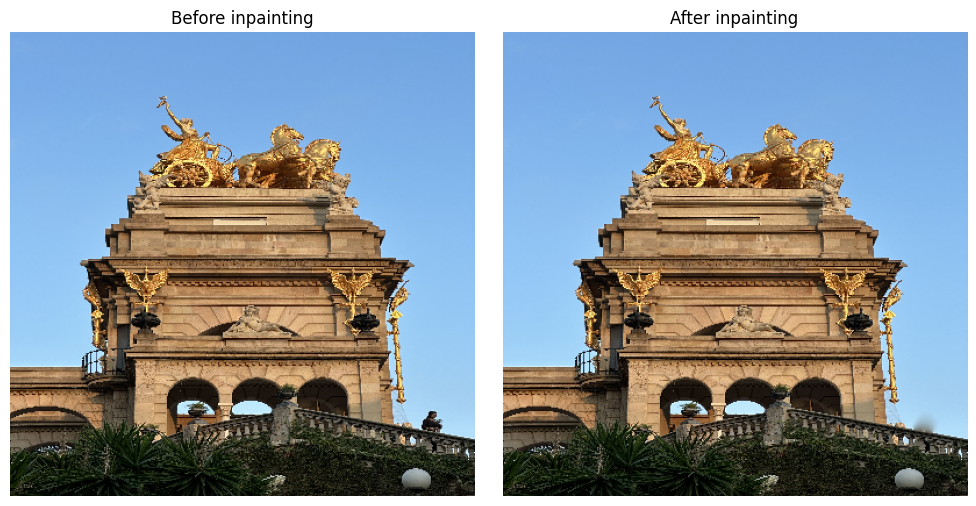

In [185]:
# example image 3
figure_name_final='./IMAGES/example 3.jpg'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)
I = cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
I = cv2.resize(I, (400,400))


# read mask image
mask_img_name='./IMAGES/example 3_mask.jpg'
mask_img = cv2.imread(mask_img_name,cv2.IMREAD_UNCHANGED)
mask_img = cv2.resize(mask_img, (400,400))

image_inpainting(I,mask_img)